In [5]:
from lib.full_flow_dataloader import load_full_flow_data
import pandas as pd

train, test = load_full_flow_data()
full_data = pd.concat([train, test], axis=0)

In [6]:
import matplotlib.pyplot as plt

def plot_distribution_comparison(df1, df2, column, labels, colors, bins=30, figsize=(12, 6)):
    """
    Plots the distribution comparison of a specified column between two dataframes.

    Parameters:
    - df1: First dataframe
    - df2: Second dataframe
    - column: Column name to compare
    - labels: Tuple of labels for the dataframes (label1, label2)
    - colors: Tuple of colors for the histograms (color1, color2)
    - bins: Number of bins for the histogram
    - figsize: Size of the figure
    """
    plt.figure(figsize=figsize)

    # Determine the range for the x-axis
    min_val = min(df1[column].min(), df2[column].min())
    max_val = max(df1[column].max(), df2[column].max())

    # Plot for first dataframe
    plt.subplot(1, 2, 1)
    plt.hist(df1[column], bins=bins, alpha=0.7, label=labels[0], range=(min_val, max_val), color=colors[0])
    plt.title(f'Distribution of {column} in {labels[0]}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

    # Plot for second dataframe
    plt.subplot(1, 2, 2)
    plt.hist(df2[column], bins=bins, alpha=0.7, label=labels[1], range=(min_val, max_val), color=colors[1])
    plt.title(f'Distribution of {column} in {labels[1]}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

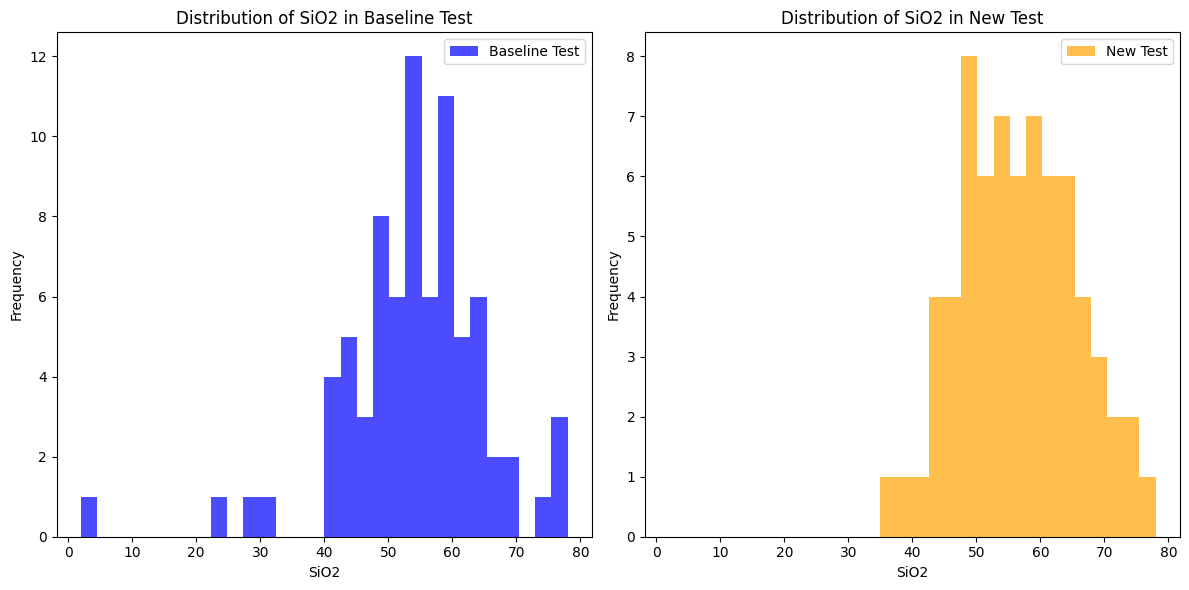

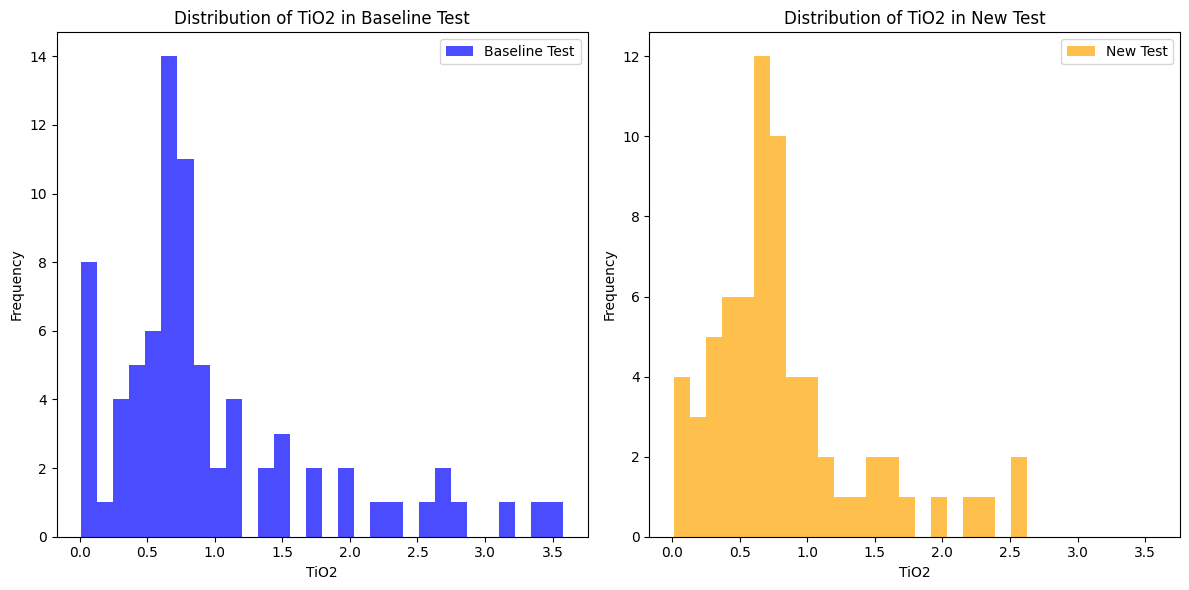

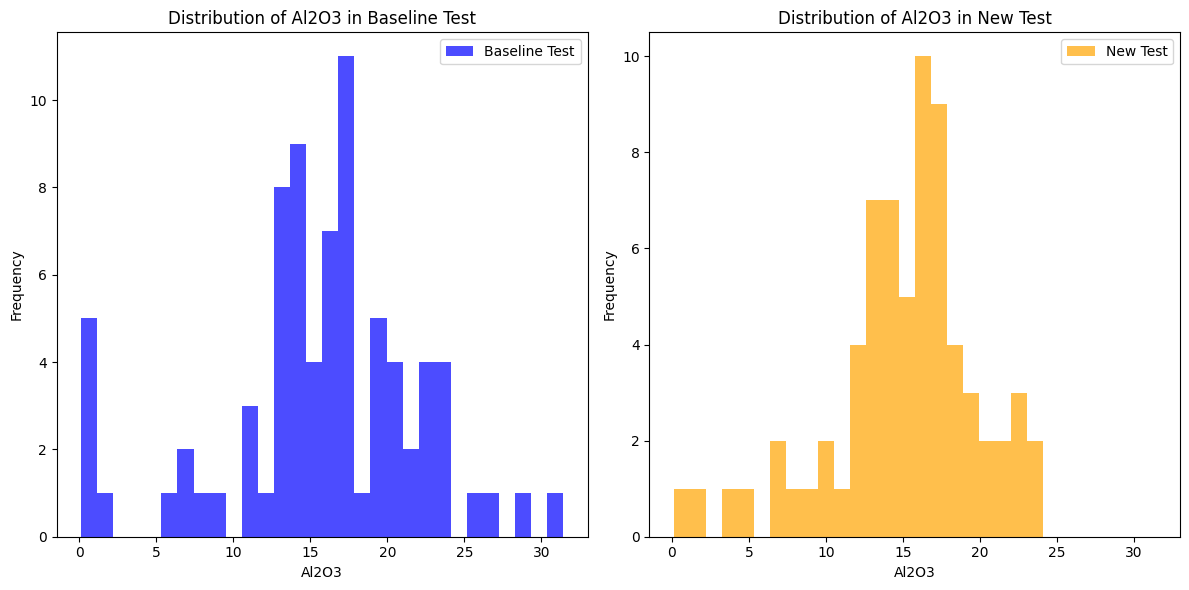

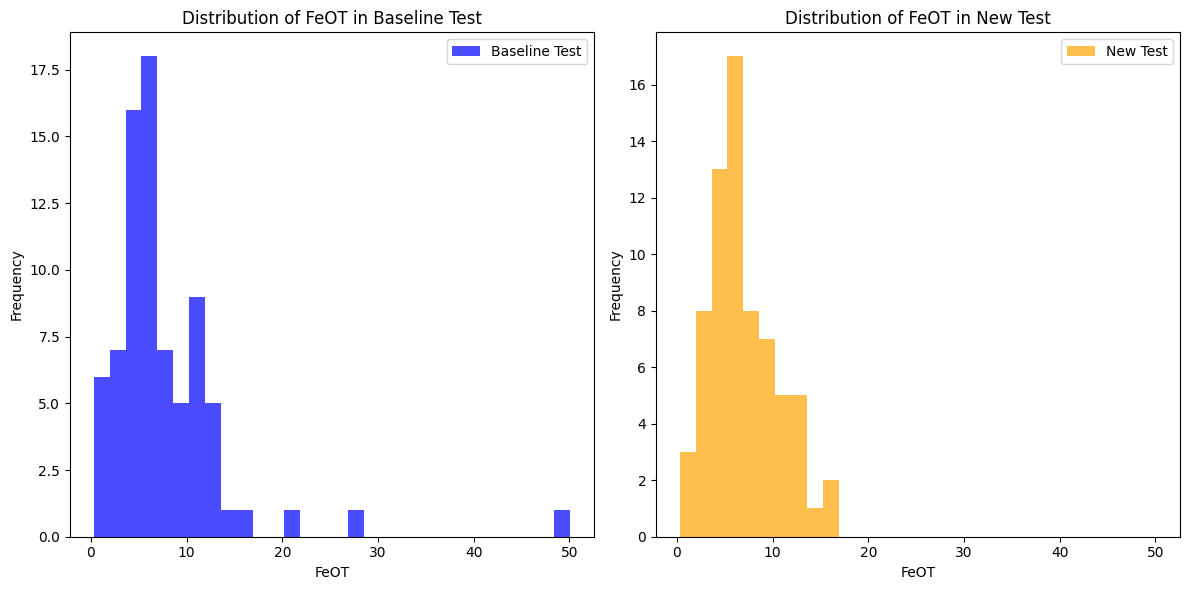

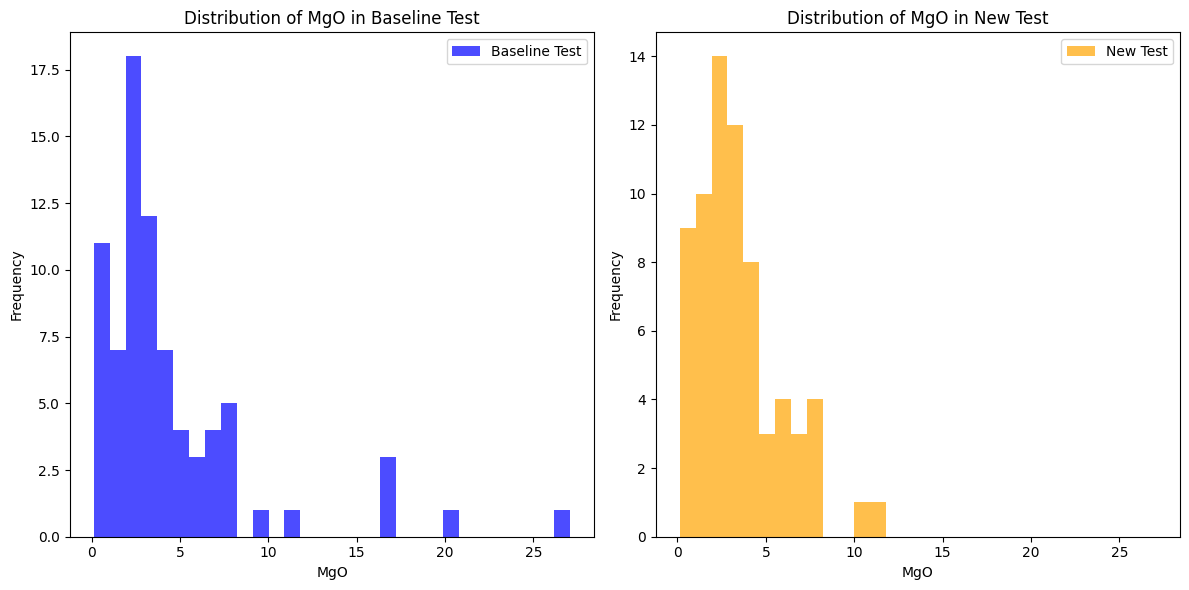

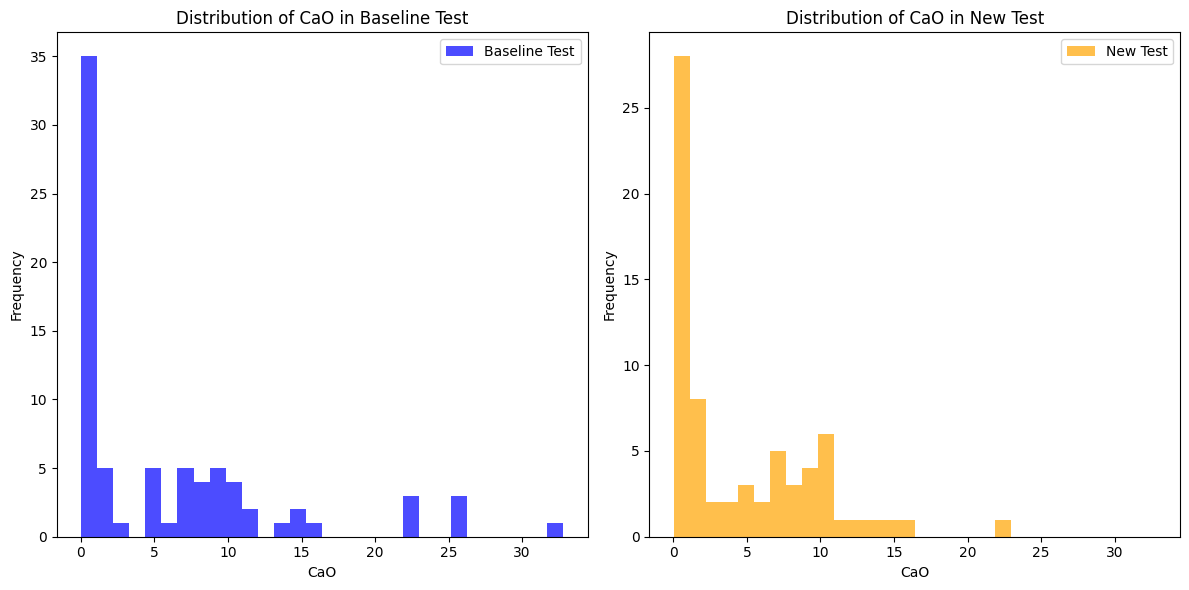

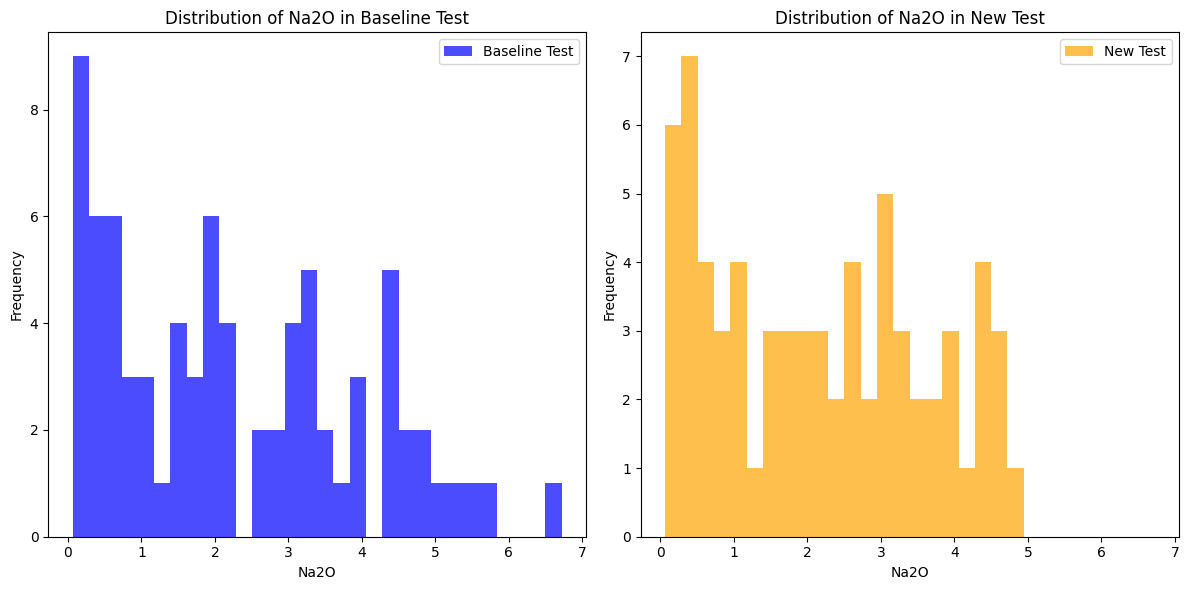

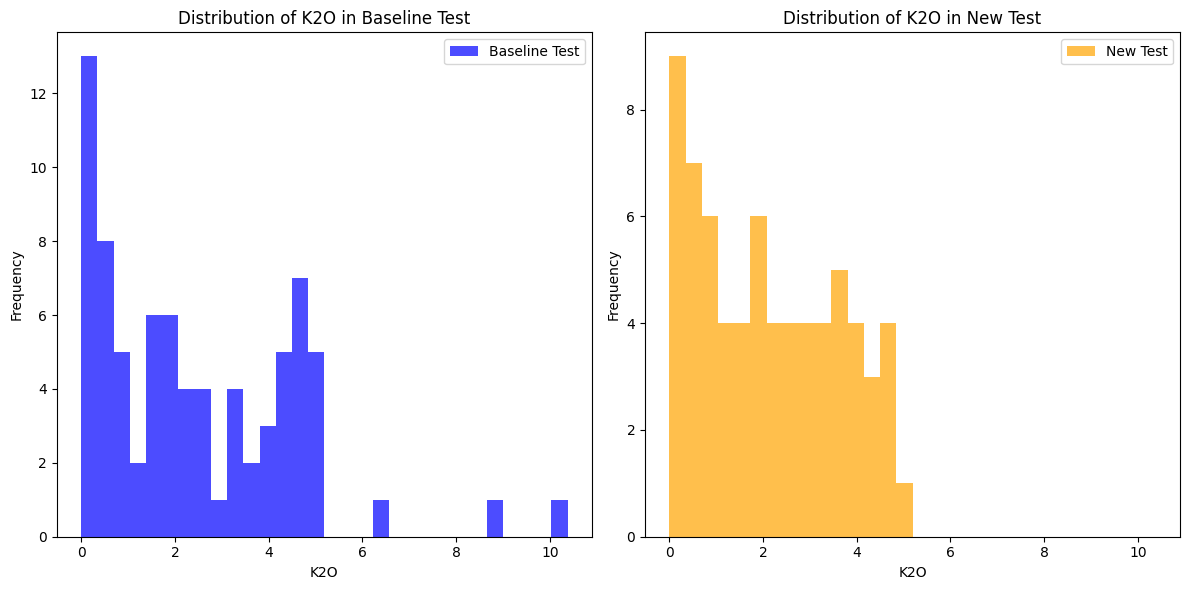

In [7]:
from lib.cross_validation import custom_kfold_cross_validation_new
from lib.reproduction import major_oxides

for oxide in major_oxides:
    folds, train_new, test_new = custom_kfold_cross_validation_new(
        data=full_data, k=5, group_by="Sample Name", target=oxide, random_state=42
    )

    test_unique = test.drop_duplicates(subset='Sample Name')
    test_new_unique = test_new.drop_duplicates(subset='Sample Name')
    
    plot_distribution_comparison(test_unique, test_new_unique, oxide, labels=('Baseline Test', 'New Test'), colors=('blue', 'orange'))
